### What can I understand about the history of Scottsdale by looking at the structure of business names registed to do business in Scottsdale over time?

#### The [dataset](http://data.scottsdaleaz.gov/dataset/business-licenses) doesn't include the date that the business first filed for a business license.  Business licenses must be renewed ever few years.  The "Issue Date" within the dataset represents the most recent renewal date.  By spot checking a handful of businesses at the beginning and end of the "License Number" sequence and reviewing the business website and other information available, I'm quite certain License Numbers are issued sequentially.

#### My process involved: 1) tokenize the business name, 2) sort business license dataset by license number, 3) bin the data into 5 bins and filter by the bins, 4) graph bins agains each other(for the time being, just bin 1 and bin 5)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.draw.dispersion import dispersion_plot

#nltk.download('punkt') - only need to do this once

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

business_licenses = pd.read_csv('BusinessLicenses_cleaned.txt', sep='|', engine='python')

# tokenize words in the 'BusinessName' column
business_licenses['Tokenize_Text'] = business_licenses['BusinessName'].apply(nltk.word_tokenize)

# sort business names ascending
business_licenses.sort_values(['LicenseNumber'], ascending=True, inplace=True)

In [33]:
business_licenses.reset_index(inplace=True)
business_licenses.head()

,index,BusinessName,LicenseNumber,LicenseType,ServiceStreet,ServiceStreet2,ServiceUnitType,ServiceUnit,ServiceCity,ServiceCounty,ServiceState,ServiceZip,ServiceCountry,IssuedDate,MailingStreet,MailingStreet2,MailingUnitType,MailingUnit,MailingCity,MailingCounty,MailingState,MailingZip,MailingCountry,Tokenize_Text,Bucket
0,21690,A-ACCENT PLUMBING INC,27,TPS,2721 E INDIAN SCHOOL RD,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850166855,USA,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[A-ACCENT, PLUMBING, INC]",5
1,10381,ASSOCIATED FINISHES INC,168,TPS,7335 E ACOMA DR STE 101,NaN,STE,101,SCOTTSDALE,MARICOPA,AZ,852603120,USA,2015-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ASSOCIATED, FINISHES, INC]",3
2,11045,BARRY'S DANCE THEATRE SHOP,206,TPS,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,2015-12-28 00:00:00,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,"[BARRY, 'S, DANCE, THEATRE, SHOP]",3
3,2447,BASHAS 16,211,TPS,8423 E MCDONALD DR,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852506326,USA,2015-12-01 00:00:00,PO BOX 488,NaN,NaN,NaN,CHANDLER,MARICOPA,AZ,852440488,USA,"[BASHAS, 16]",1
4,23568,BOOTZ AND DUKE SIGN COMPANY,285,TPS,4028 W WHITTON AVE,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850193623,USA,2015-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[BOOTZ, AND, DUKE, SIGN, COMPANY]",5


In [34]:
# segment all business licenses into 5 buckets
business_licenses['Bucket'] = pd.cut(business_licenses.index, 5, labels=['1','2','3','4','5'])

In [35]:
#verify bins are distributed equally
business_licenses.groupby('Bucket')['Bucket'].count()

Bucket
1    5151
2    5151
3    5151
4    5151
5    5151
Name: Bucket, dtype: int64

### Bucket 1

In [61]:
# form bucket of businesses from earliest period of Scottsdale history

bucket_1 = business_licenses[business_licenses['Bucket'] == '1']

b1_all_words = []

for bus_name in bucket_1['Tokenize_Text']:
    b1_all_words.append(bus_name)
    
b1_all_words_flattened = [y for x in b1_all_words for y in x]

frequency_dist1 = nltk.FreqDist(b1_all_words_flattened)

# convert dictionary to dataframe
frequency_dist1_df = pd.DataFrame.from_dict(frequency_dist1, orient='index') 

frequency_dist1_df['Bucket'] = 'Oldest 20%'

In [59]:
bucket_1.sort_values(['LicenseNumber'],ascending=True).head()

,index,BusinessName,LicenseNumber,LicenseType,ServiceStreet,ServiceStreet2,ServiceUnitType,ServiceUnit,ServiceCity,ServiceCounty,ServiceState,ServiceZip,ServiceCountry,IssuedDate,MailingStreet,MailingStreet2,MailingUnitType,MailingUnit,MailingCity,MailingCounty,MailingState,MailingZip,MailingCountry,Tokenize_Text,Bucket
0,21690,A-ACCENT PLUMBING INC,27,TPS,2721 E INDIAN SCHOOL RD,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850166855,USA,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[A-ACCENT, PLUMBING, INC]",1
1,10381,ASSOCIATED FINISHES INC,168,TPS,7335 E ACOMA DR STE 101,NaN,STE,101,SCOTTSDALE,MARICOPA,AZ,852603120,USA,2015-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ASSOCIATED, FINISHES, INC]",1
2,11045,BARRY'S DANCE THEATRE SHOP,206,TPS,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,2015-12-28 00:00:00,2246 N SCOTTSDALE RD,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852572125,USA,"[BARRY, 'S, DANCE, THEATRE, SHOP]",1
3,2447,BASHAS 16,211,TPS,8423 E MCDONALD DR,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852506326,USA,2015-12-01 00:00:00,PO BOX 488,NaN,NaN,NaN,CHANDLER,MARICOPA,AZ,852440488,USA,"[BASHAS, 16]",1
4,23568,BOOTZ AND DUKE SIGN COMPANY,285,TPS,4028 W WHITTON AVE,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850193623,USA,2015-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[BOOTZ, AND, DUKE, SIGN, COMPANY]",1


In [60]:
frequency_dist1_df.head()

,0,Bucket
INC,1199,Oldest 20%
LLC,581,Oldest 20%
&,317,Oldest 20%
#,205,Oldest 20%
AND,175,Oldest 20%


### Bucket 5

In [57]:
# form all business names into a list
bucket_5 = business_licenses[business_licenses['Bucket'] == '5']

b5_all_words = []

for bus_name in bucket_5['Tokenize_Text']:
    b5_all_words.append(bus_name)

# flatten into one list
b5_all_words_flattened = [y for x in b5_all_words for y in x]

# produce frequency distribution
frequency_dist5 = nltk.FreqDist(b5_all_words_flattened)

# convert dictionary to dataframe
frequency_dist5_df = pd.DataFrame.from_dict(frequency_dist5, orient='index')

frequency_dist5_df['Bucket'] = 'Newest 20%'

In [58]:
bucket_5.sort_values(['LicenseNumber'],ascending=True).head()

,index,BusinessName,LicenseNumber,LicenseType,ServiceStreet,ServiceStreet2,ServiceUnitType,ServiceUnit,ServiceCity,ServiceCounty,ServiceState,ServiceZip,ServiceCountry,IssuedDate,MailingStreet,MailingStreet2,MailingUnitType,MailingUnit,MailingCity,MailingCounty,MailingState,MailingZip,MailingCountry,Tokenize_Text,Bucket
20604,17432,PINK ZEBRA AT HOME LLC,1121585,TPS,1601 GILLINGHAM LN STE 120,NaN,STE,120,SUGAR LAND,FORT BEND,TX,774782984,USA,2016-04-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[PINK, ZEBRA, AT, HOME, LLC]",5
20605,17185,SAEID MOTAKALEM,1121589,TPS,10061 E FRIESS DR,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852607541,USA,2015-11-30 00:00:00,2400 E MISSOURI AVE,NaN,NaN,NaN,PHOENIX,MARICOPA,AZ,850163106,USA,"[SAEID, MOTAKALEM]",5
20606,13878,MORTENSEN SIGNATURE HOMES OF A,1121591,TPS,41717 N 113TH WAY,NaN,NaN,NaN,SCOTTSDALE,MARICOPA,AZ,852623518,USA,2015-12-01 00:00:00,PO BOX 132,NaN,NaN,NaN,FREEDOM,LINCOLN,WY,831200132,USA,"[MORTENSEN, SIGNATURE, HOMES, OF, A]",5
20607,13541,LEAD MD INC,1121595,TPS,15849 N 77TH ST STE 2,NaN,STE,2,SCOTTSDALE,MARICOPA,AZ,852601746,USA,2015-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[LEAD, MD, INC]",5
20608,13452,EPOCH ESTATE WINES,1121597,TPS,7575 YORK MOUNTAIN RD,NaN,NaN,NaN,TEMPLETON,SAN LUIS OBISPO,CA,934659300,USA,2016-01-04 00:00:00,1421 BLAKE ST,NaN,NaN,NaN,DENVER,DENVER,CO,802021325,USA,"[EPOCH, ESTATE, WINES]",5


In [55]:
frequency_dist5_df.head()

,0,Bucket
LLC,1300,Newest 20%
INC,530,Newest 20%
&,306,Newest 20%
AND,175,Newest 20%
SCOTTSDALE,166,Newest 20%


### Join buckets together

In [42]:
frequency_dist_total = frequency_dist5_df.sort_values(0, ascending=False).head(100) \
    .append(frequency_dist1_df.sort_values(0, ascending=False) \
    .head(100))

frequency_dist_total = frequency_dist_total.reset_index()
frequency_dist_total.shape

(200, 3)

### Graph results

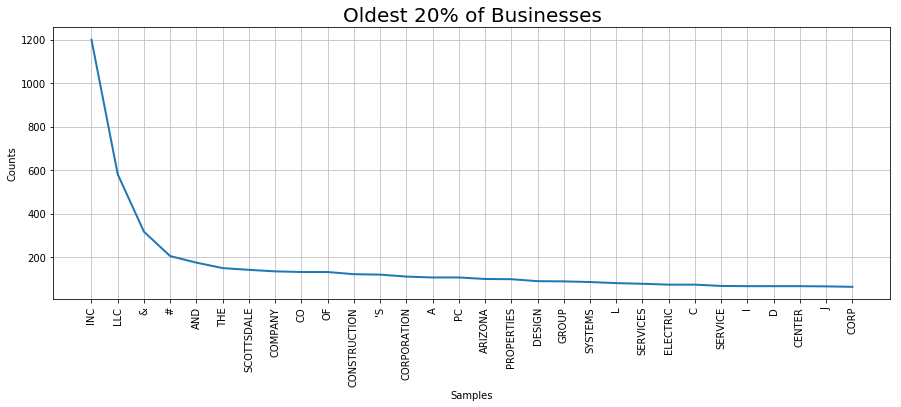

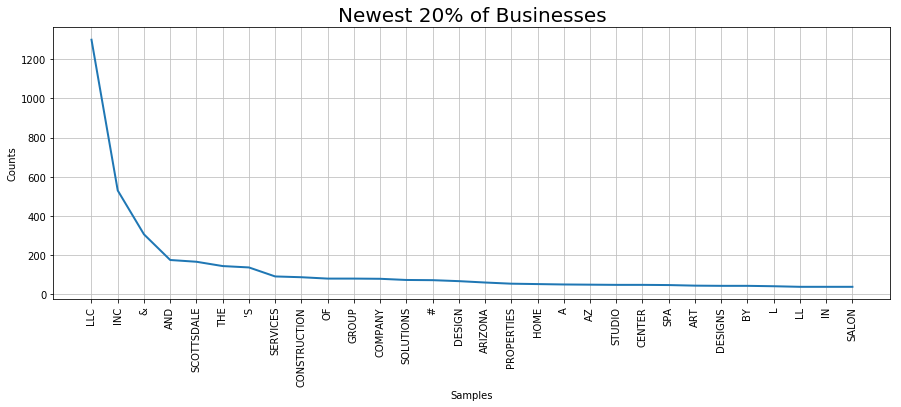

In [43]:
plt.rcParams["figure.figsize"] = [15, 5]

plt.title('Oldest 20% of Businesses',fontsize=20)
frequency_dist1.plot(30, cumulative=False)

plt.title('Newest 20% of Businesses',fontsize=20)
frequency_dist5.plot(30, cumulative=False)

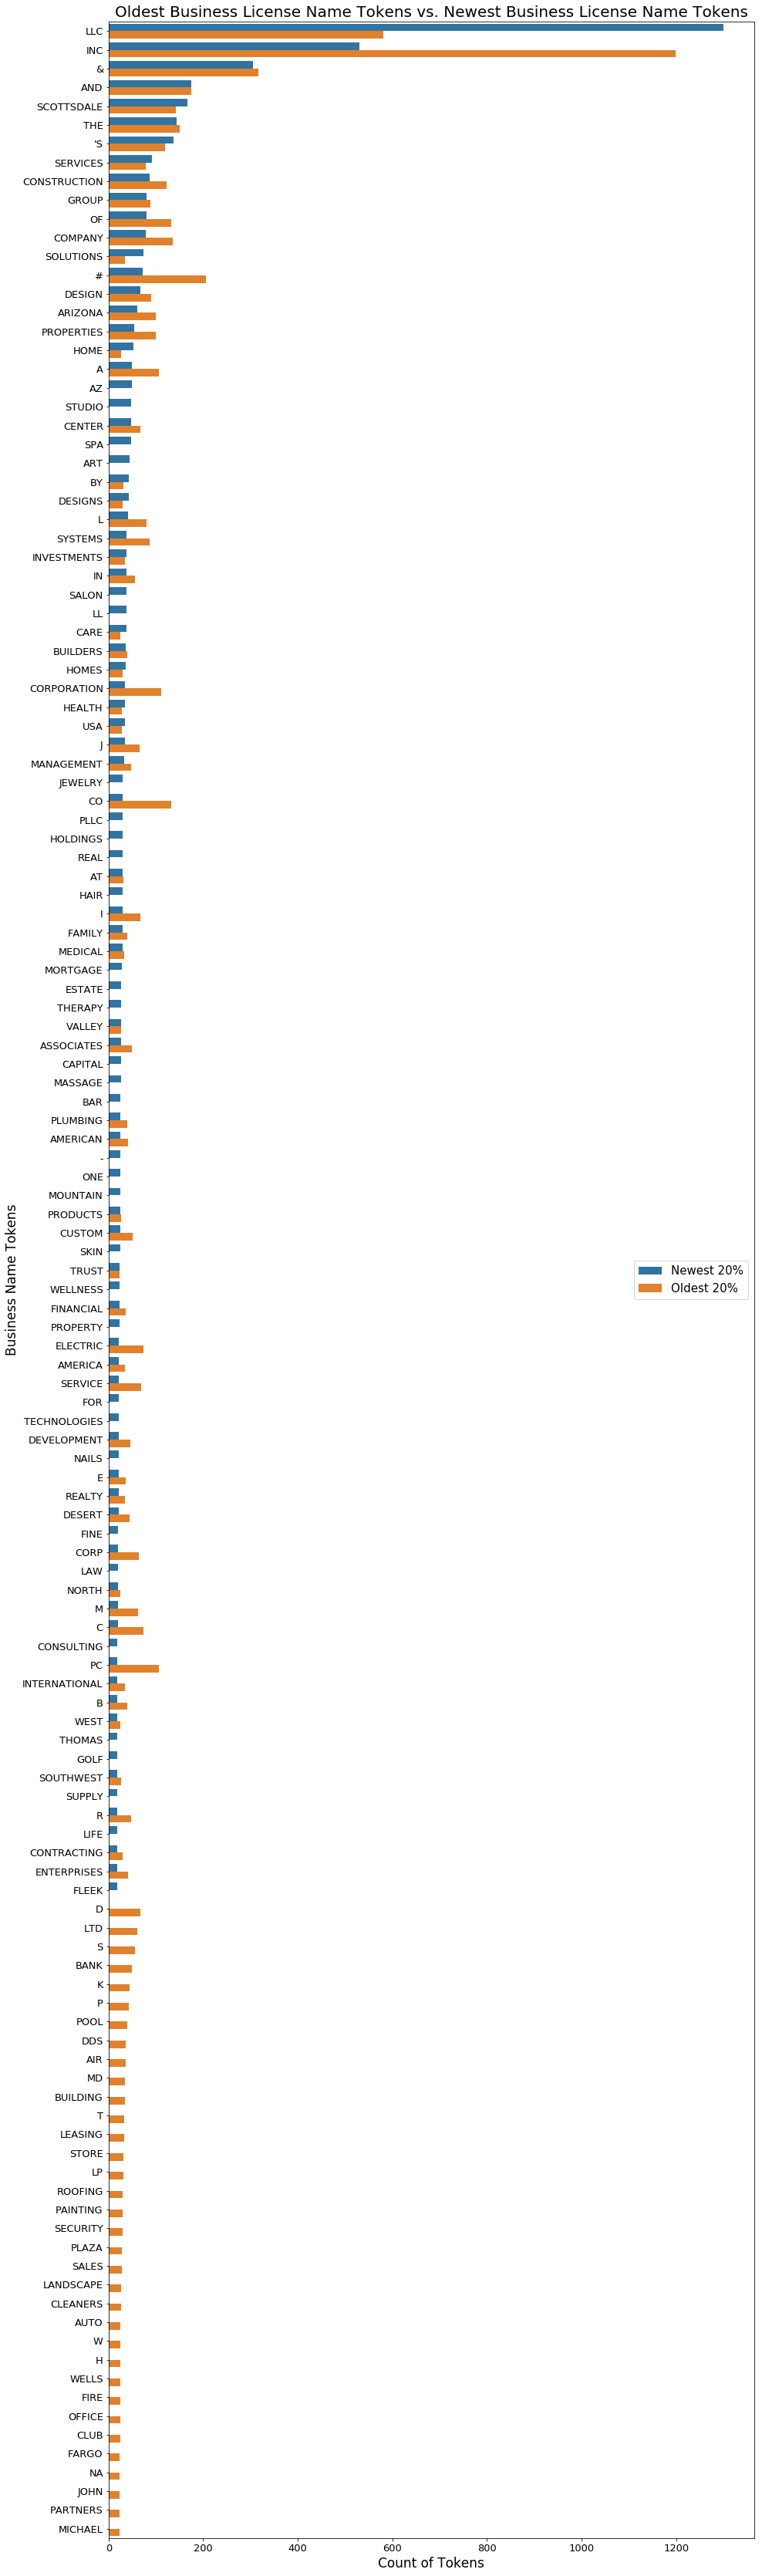

In [44]:
plt.rcParams["figure.figsize"] = [15, 60]

sns.barplot(x=frequency_dist_total.iloc[:,1], \
             y=frequency_dist_total.iloc[:,0], \
             hue=frequency_dist_total.iloc[:,2], \
             data=frequency_dist_total)

plt.title('Oldest Business License Name Tokens vs. Newest Business License Name Tokens',fontsize=20)
plt.ylabel('Business Name Tokens',fontsize=17)
plt.xlabel('Count of Tokens',fontsize=17)
plt.tick_params(labelsize=13)
plt.legend(loc='center right',fontsize=15)